### Data visualization
* 데이터 품질 및 분포 특성을 시각적으로 확인하기 위해 사용
* 데이터 이해 및 분석 결과를 설득력 있게 표현하기 위해서 사용

### 모집단(population)과 표본집단(sample)
* population: 분석 목표에 해당하는 '전체 대상'
* sample: 모집단에서 추출된, 모집단의 부분 집합   

표본집단으로부터 모집단의 특성을 추정하기 위해 통계학적 기법들을 사용함

### 단일 변수에 대한 분포를 확인할 때
* histogram: 도수분포표 시각화
* density plot(KDE; kernel density estimation): 커널 함수를 사용하여 데이터 분포로부터 해당 확률 변수의 확률 밀도 함수(PDF)를 추정하는 비모수적(non-parametic) 방법
* box plot
* violin plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # 실행결과로 나오는 이미지에 시각적 효과 추가

In [2]:
df = pd.read_csv('./data/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


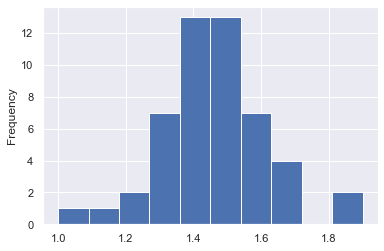

In [7]:
# Histogram
# setosa - petal length
df[df['variety'] == 'Setosa']['petal.length'].plot.hist()
plt.show()

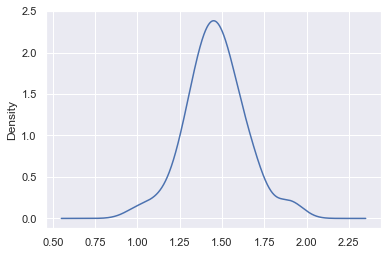

In [8]:
# Density plot # pandas 기우시안 커널 사용
df[df['variety'] == 'Setosa']['petal.length'].plot.density()
plt.show()

* histogram: x - 실제 값, y - 개수(count)
* density plot: x - 실제 값, y - 비율(proportion)

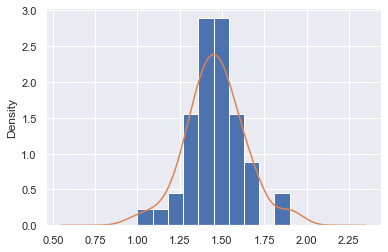

In [12]:
ax = df[df['variety'] == 'Setosa']['petal.length'].plot.hist(density=True)
df[df['variety'] == 'Setosa']['petal.length'].plot.density(ax=ax)
plt.show()

* 데이터 대다수가 위치한 중심값이 어딘지(location)
* 데이터가 중심으로부터 얼마나 퍼져있는지(variabilty)

* 왜도(skewness): 비대칭성 확인   
Negative skewness: 데이터 중심이 오른쪽에 치우쳐짐(left-skewed)   
Positive skewness: 데이터 중심이 왼쪽에 치우쳐짐(right-skewed)

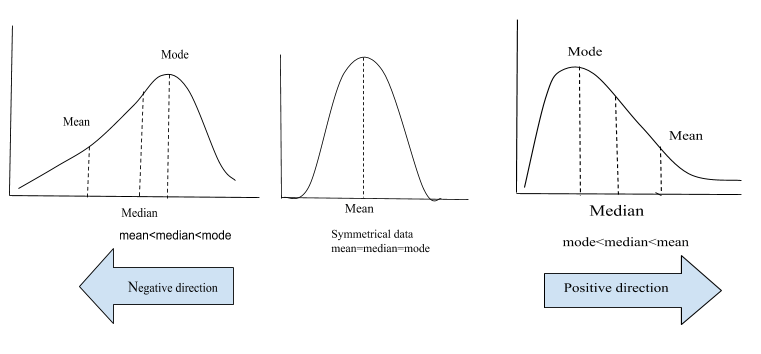

* 첨도(kurtosis): 데이터가 평균에 몰려있는 정도   
Leptokurtic: 고첨. 정규분포보다 많이 몰려있어 뾰족   
Mesokurtic: 중첨. 정규분포와 유사   
Platykurtic: 저첨. 정규분포보다 완만

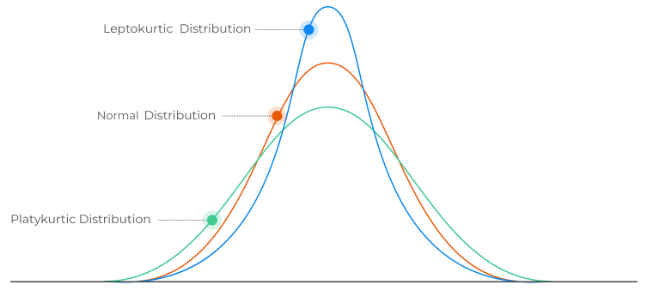

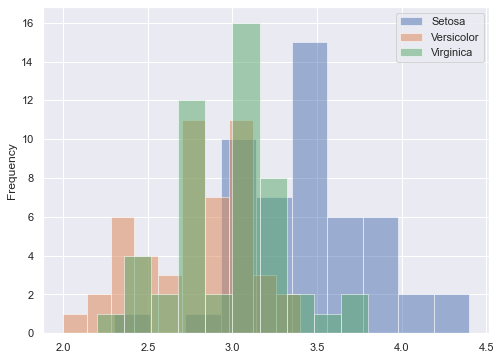

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for species in df['variety'].unique(): # 'Setosa', 'Versicolor', 'Virginica'
    ddf = df[df['variety'] == species]['sepal.width']
    ddf.plot.hist(alpha = 0.5, ax = ax, label = species)

plt.legend(loc='upper right')
plt.show()

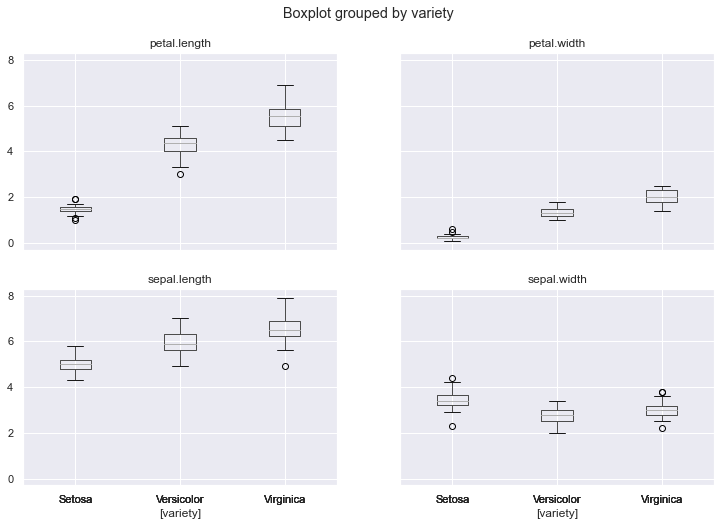

In [24]:
# Box plot
# df.boxplot()

# 한가지 attribute에 대해
# df.boxplot(column=['sepal.length'], by='variety', figsize=(12, 8))
# plt.show()

df.boxplot(by='variety', figsize=(12, 8))
plt.show()

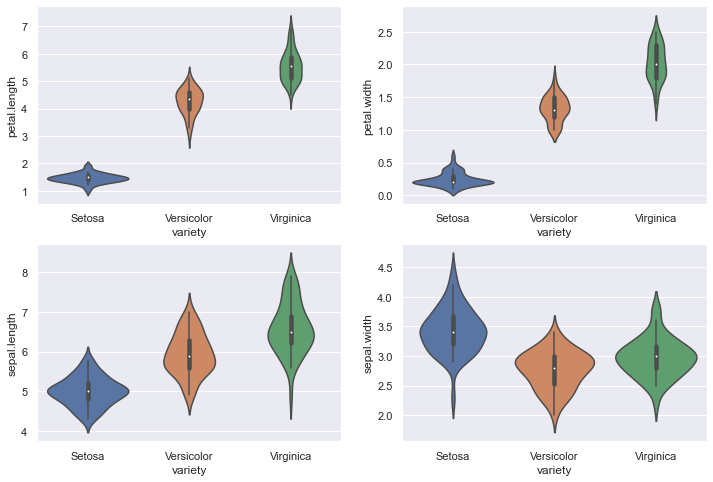

In [29]:
# Violin plot
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(['petal.length', 'petal.width', 'sepal.length', 'sepal.width']):
    sns.violinplot(data=df, x='variety', y=col, ax=ax[i//2][i%2]) # 0 0 / 0 1 / 1 0 / 1 1

plt.show()

### Measures of Center
데이터 분포의 중심 위치 추론
* 평균(mean): 데이터의 모든 값을 합한 후 데이터 전체 개수로 나누어 계산   
모집단의 평균은 𝜇, 표본집단의 평균은 x̄(x-bar)로 표기함
* 중앙값(median): 데이터를 정렬했을 때 중간에 위치한 값
* mode: 가장 빈도수가 높은 값. 데이터 내 중복값이 없다면 mode는 없음

데이터 분포에 따라 적절한 값을 선택하여 사용

평균은 중앙값보다 outlier의 영향을 많이 받음.   
이를 보완하기 위해 절삭평균(trimmed mean)을 사용할 수 있음

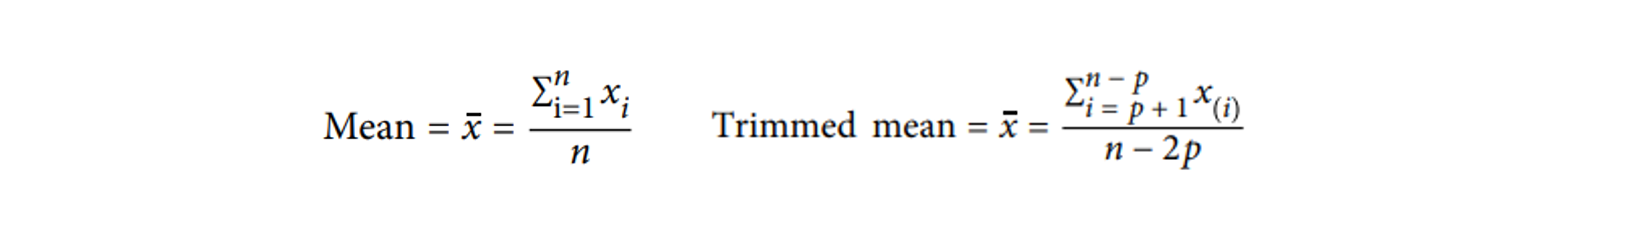

In [30]:
from scipy.stats import trim_mean
import numpy as np

In [31]:
data = np.array([1, 2, 2, 3, 3, 3, 4, 4, 5, 10])

<AxesSubplot:ylabel='Frequency'>

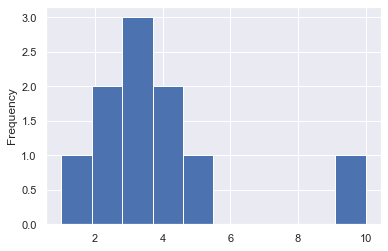

In [32]:
data_df = pd.Series(data)
data_df.plot.hist()

In [33]:
print('평균: ', np.mean(data),
     '\n절삭평균: ', trim_mean(data, 0.1),
     '\n중앙값: ', np.median(data))

평균:  3.7 
절삭평균:  3.25 
중앙값:  3.0


### Measures of Variability
데이터 분포가 중심 위치로부터 얼마나 퍼져있는지 추론
* 분산(variance)
* 범위(range): 데이터 내 최대값과 최소값의 차(difference)
* IQR(InterQuartile Range): lower quartile(Q1)과 upper quartile(Q3)의 차

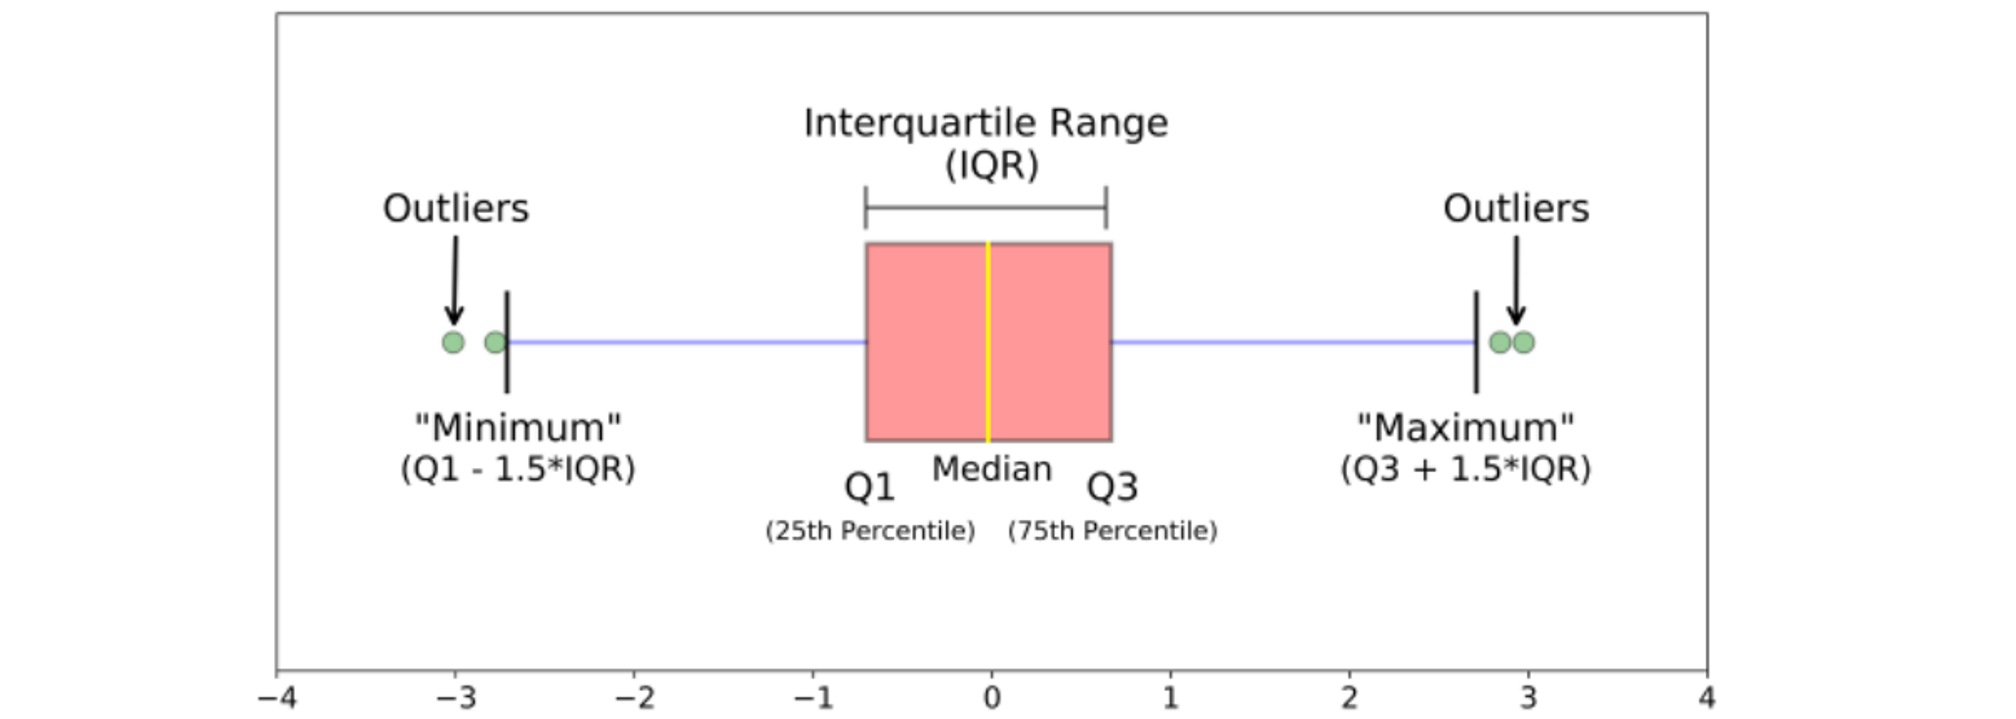

In [26]:
df_ = pd.Series([1, 2, 3, 4, 5, 6, 7])
print(df_.quantile(0.25)) # Q1
print(df_.quantile(0.5)) # Q2 # Median 중앙값
print(df_.quantile(0.75)) # Q3

2.5
4.0
5.5


* 편차(deviation): 데이터 관측값(observed data)와 평균의 차이   
* 분산: 편차 제곱 평균   
* 표준오차(standard deviation): 분산의 제곱근. (모집단: σ, 표본집단: s)

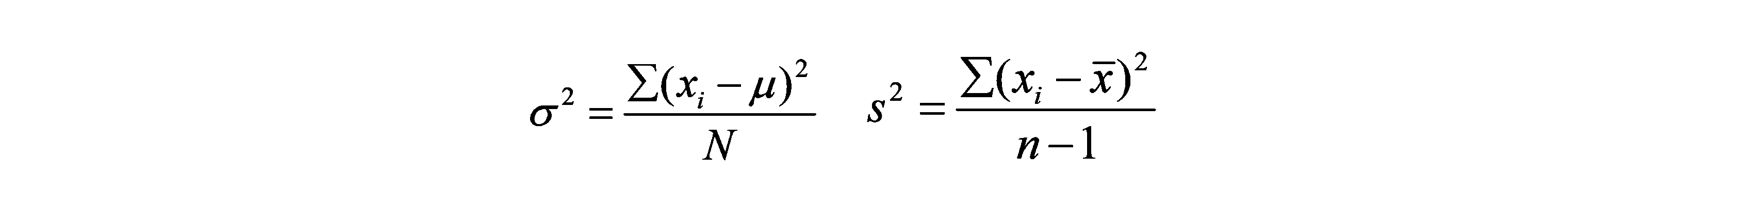

분산을 계산하는 과정에서 제곱을 사용하므로, 원본 데이터와 단위가 차이나게 됨   
분산의 제곱근인 표준오차를 사용하면 더 직관적으로 이해할 수 있음

In [35]:
data = np.array([5, 12, 6, 8, 14])
data.sort()
print(data)

print('평균: ', np.mean(data),
     '\n분산: ', np.var(data),
     '\n표준편차', np.std(data)
     )

[ 5  6  8 12 14]
평균:  9.0 
분산:  12.0 
표준편차 3.4641016151377544


#### Empirical Rule
정규 분포와 유사한 분포에 대한 경험적인 규칙
* 𝜇 ± σ(x̄ ± s) 구간 내에, 전체 값들의 68%가 존재함
* 𝜇 ± 2σ(x̄ ± 2s) 구간 내에, 전체 값들의 95%가 존재함
* 𝜇 ± 3σ(x̄ ± 3s) 구간 내에, 전체 값들의 99.7%가 존재함

#### Tchebysheff's Theorem (체비쇼프 부등식)
모든 분포에 대해,   
𝜇 ± kσ(x̄ ± ks) 구간 내에, 전체 값들의 촤소 (1-k^2)%는 존재함

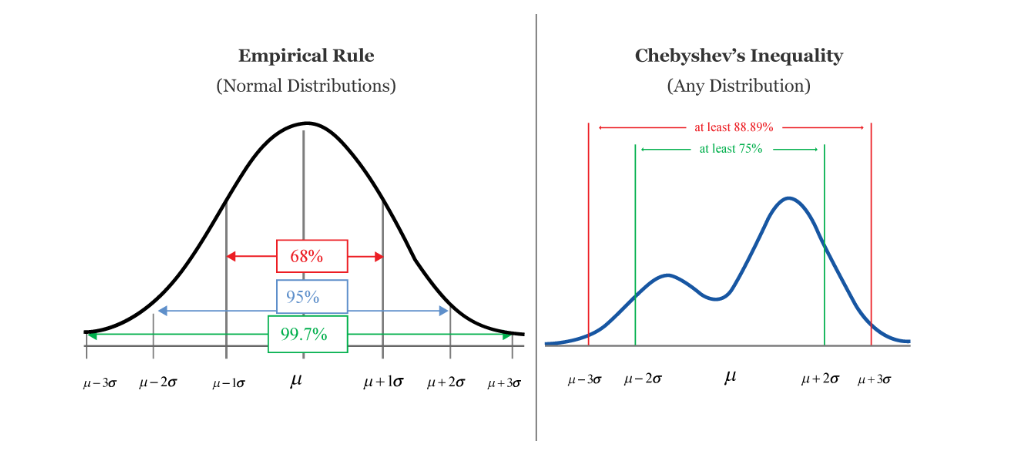

example)   
어떤 일에 대한 작업자들의 근로시간이 평균 12.8분, 표준편차 1.7분   
근로시간에 대한 분포는 정규 분포와 유사한 모양(mound-shape, not skewed)을 가진다

전체 작업자 중 16.2분보다 오래 걸리는 작업자의 비율은 얼마일까?

#### z-score (standardization. normalization)
어떤 관측값이 center(평균)으로부터 얼마나 떨어져 있는지 평가하는 수치적 기준으로 사용할 수 있음   
Empirical Rule과 Tchebysheff's Theorem로부터,   
𝜇 ± 2σ 구간 내에 전체 데이터의 3/4 이상(정규 분포라면 95%) 위치   
𝜇 ± 3σ 구간 내에 전체 데이터의 8/9 이상(정규 분포라면 99.7%) 위치한다는 것을 알 수 있음   
이를 통해 z-score값의 절대값이 3 이상인 경우 outlier로 판단할 수 있음

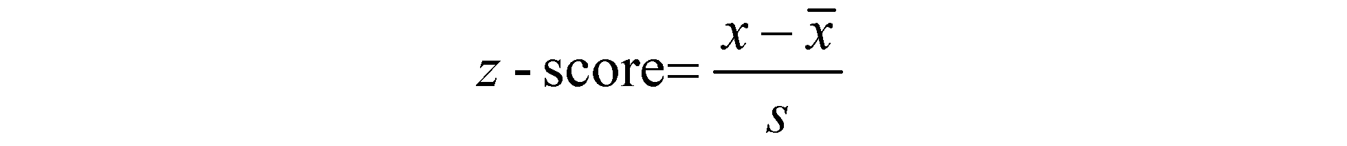

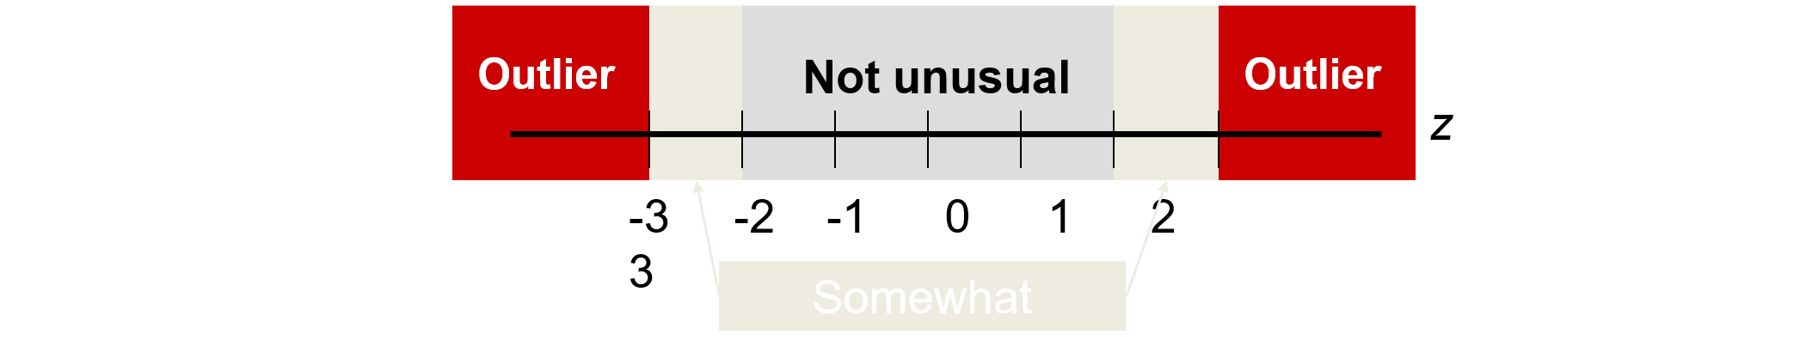

### 두가지 변수(bivariate)가 이루는 관계를 확인할 때
* scatter plot: 두 변수를 (x, y) 쌍으로 만들어 2차원 그래프로 표현

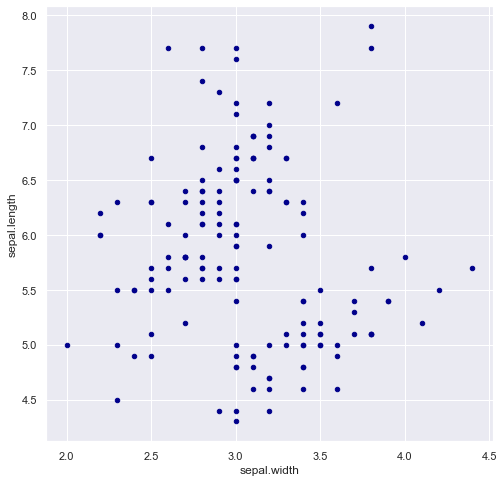

In [37]:
# Scatter plot
# sepal.width, sepal.length 관계
df.plot.scatter(x='sepal.width', y='sepal.length', c='DarkBlue', figsize=(8, 8))
plt.show()

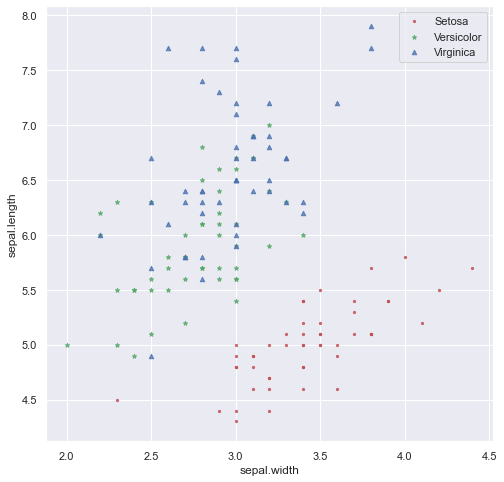

In [38]:
# 각 클래스(variety) 별로 마커의 색과 모양 다르게 하기
colors = ['r', 'g', 'b']
markers = ['.', '*', '^']

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

for i, species in enumerate(df['variety'].unique()):
    ddf = df[df['variety'] == species]
    ddf.plot.scatter(x='sepal.width', y='sepal.length',
                    alpha = 0.8, ax = ax,
                    color = colors[i], marker = markers[i], label = species)
plt.legend(loc='upper right')
plt.show()

* 어떤 모양, 패턴을 가지는지(form, pattern) - straight, curve, no pattern
* 패턴이 어느정도 뚜렷하게 나타나는지(strong)
* 특이한 관측치가 나타나는지(unusual observation) - cluster, outlier

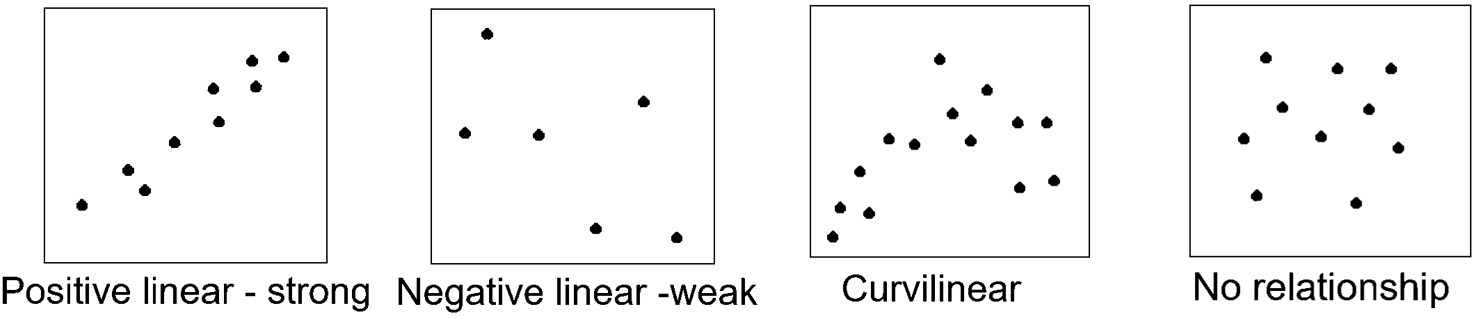

#### 공분산(covariance)
* 두 (확률)변수가 이루는 선형(linear) 관계를 수치적으로 나타내는 값
* 공분산이 양수인 경우: 두 변수는 양의 선형관계가 있음
* 공분산이 음수인 경우: 두 변수는 음의 선형관계가 있음
* 공분산이 0인 경우: 두 변수는 서로 독립이거나, 선형관계가 아님   


* 변수의 scale의 영향을 받기 때문에 선형정도를 비교하는 용으로는 적절하지 않음

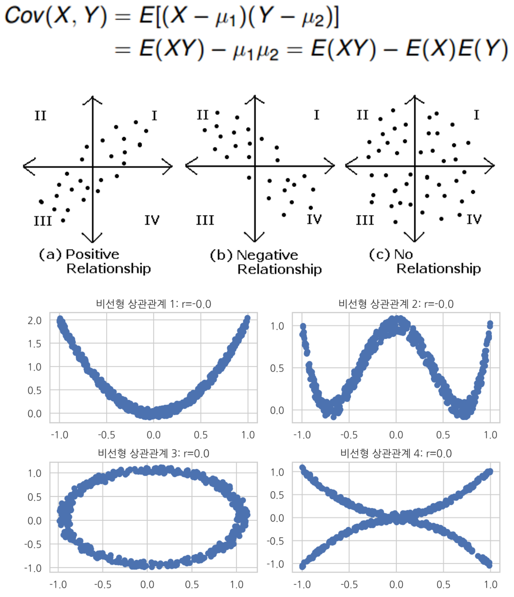

#### 상관계수(correlation coefficient)
* 두 변수가 선형관계를 어느 정도 이루는지 수치적으로 나타내는 계수

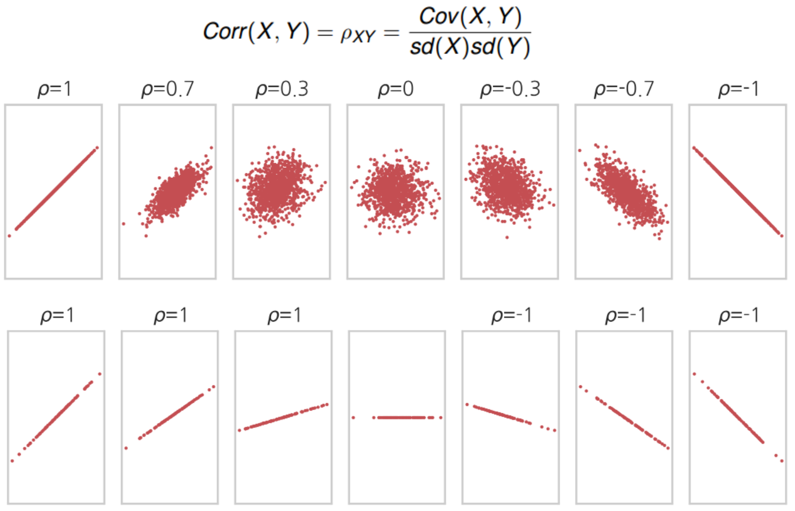

In [39]:
df.corr(method='pearson')

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


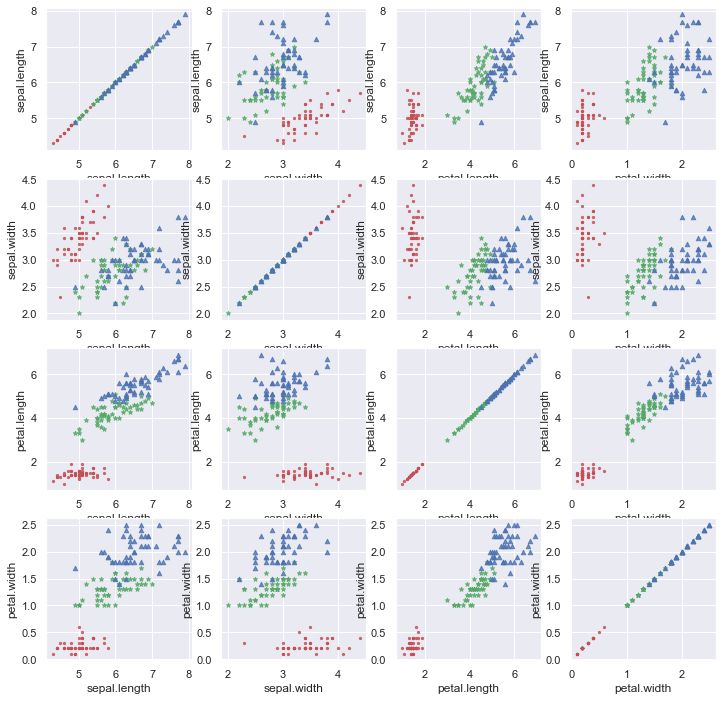

In [40]:
colors = ['r', 'g', 'b']
markers = ['.', '*', '^']

fig, ax = plt.subplots(4, 4, figsize=(12, 12))

col_names = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
for i, col1 in enumerate(col_names):
    for j, col2 in enumerate(col_names):
        for k, species in enumerate(df['variety'].unique()):
            ddf = df[df['variety'] == species]
            ddf.plot.scatter(x=col1, y=col2,
                            alpha = 0.8, ax = ax[j][i],
                            color = colors[k], marker = markers[k])
plt.show()